## Multiple Linear Regression for Bike Sharing

### Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider __BoomBikes__ has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


### Business Goal:
Required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 


- __Step1 Data understanding, preparation and EDA__
- __Step2 Model building and evaluation__ 
- __Step3 Coding Guidelines__
- __Step4 Subjective Questions__

### Importing and understanding the data

In [698]:
#Importing Necessary Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.api as sm
import warnings

warnings.filterwarnings('ignore')


In [699]:
Bike=pd.read_csv("day.csv")

Dataset characteristics
=========================================	
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [700]:
# Check the head of the dataset
Bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [701]:
#checking missing values
Bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [702]:
#empty_rows
empty_rows=Bike.isna().all(axis=1).sum()
print(empty_rows)
print("================================================")
empty_cols=Bike.isna().all(axis=0).sum()
print(empty_cols)
print("================================================")


0
0


### Observations
- All the cloumns deosnt contain __NULL__ hence we do not requried to remove any columns are modifie
- After running Bike info bike shape and Bike info columns dosnt contain any null value.
- Therefore, there were zero duplicate values in dataset.


In [703]:
Bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Step 2: Cleaning the Data
__Drop the columns that are not useful for analysis__

The following variables can be eliminated from further analysis based on the high-level perspective of the data and the data dictionary:

__instant__ :instant is simply an identifier for a row instance.

__dteday__ :Since we already have seperate columns for 'year' & 'month'. we can create new  feature of busniess_old to show how long business is running.

__casual & registered__ : Both of these columns contain the number of bikes booked by various consumer types. We'll disregard these two columns since our goal is to get the overall number of bikes, not the number of bikes in each category. 



In [704]:
# Cretaing new feature as business_old while droping dteday feature.
Bike['business_old']=(pd.to_datetime(Bike['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days
Bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,business_old
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4


In [705]:
# Droping dteday column
Bike.drop(['instant','dteday','casual','registered'], axis=1, inplace=True)


In [706]:
print(Bike.head())
print("==================================================================================================")
print(Bike.info())
print("==================================================================================================")

   season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed   cnt  business_old  
0  18.18125  80.5833  10.749882   985             0  
1  17.68695  69.6087  16.652113   801             1  
2   9.47025  43.7273  16.636703  1349             2  
3  10.60610  59.0435  10.739832  1562             3  
4  11.46350  43.6957  12.522300  1600             4  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   season        730 non-n

### Season, month, weekday, and weathersit are all integers, despite the fact that they should be non-numerical categories.

### Handling missing value after adding and removing new features


In [707]:
Bike.isnull().sum()

season          0
yr              0
mnth            0
holiday         0
weekday         0
workingday      0
weathersit      0
temp            0
atemp           0
hum             0
windspeed       0
cnt             0
business_old    0
dtype: int64

In [708]:
### Ouliers handling
print(Bike.columns)
print("==================================================================================================")
print(Bike.nunique())
print("==================================================================================================")


Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt',
       'business_old'],
      dtype='object')
season            4
yr                2
mnth             12
holiday           2
weekday           7
workingday        2
weathersit        3
temp            498
atemp           689
hum             594
windspeed       649
cnt             695
business_old    730
dtype: int64


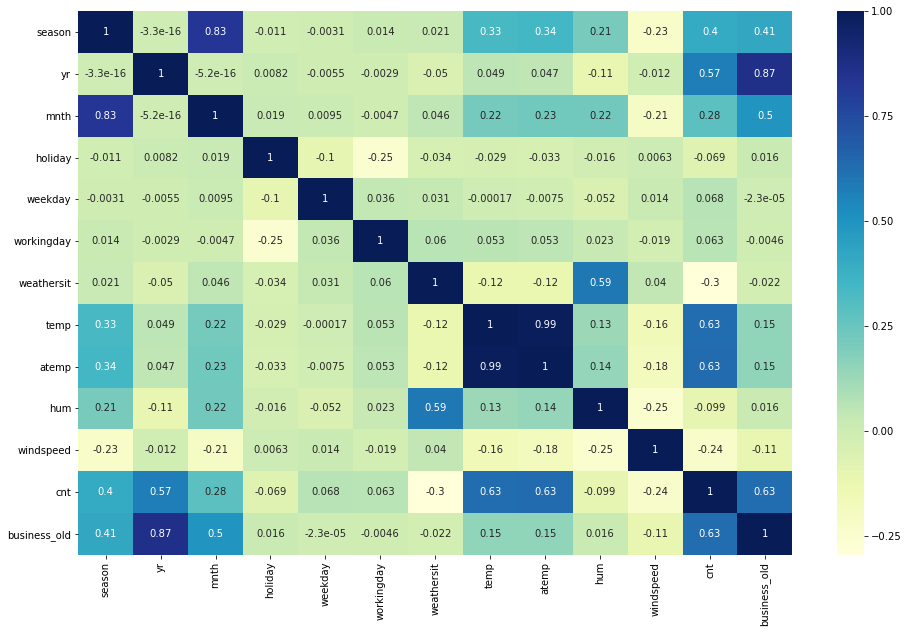

In [709]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(Bike.corr(), annot = True, cmap="YlGnBu")
plt.show()

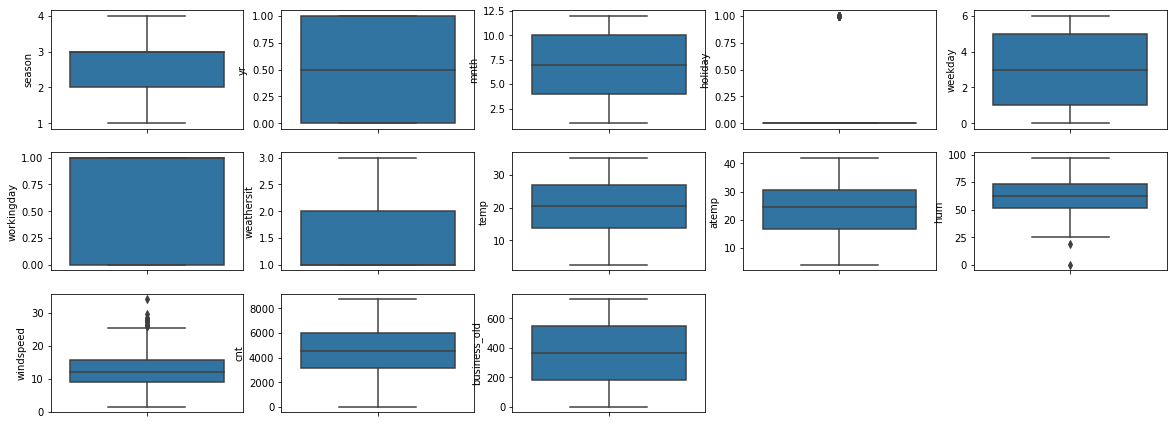

In [710]:
# Draw box plot for independt variables with continous value
#cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(20,10))

i = 1
for col in Bike :
    plt.subplot(4,5,i)
    sns.boxplot(y=col, data=Bike)
    i+=1


- __Tempearture , atemp, hum, windspeed,cnt have not outliers__ 
- __Even though sean, weathersit, months, weekday has number it represent categorical variable__ 


### STEP- 3 EDA and Visualising the Data
Let's now spend some time doing what is arguably the most important step - understanding the data.

- If there is some obvious multicollinearity going on, this is the first place to catch it
-Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using __matplotlib__ and __seaborn__.


In [711]:
# Converting season, weather, month and weekday into categorical types

Bike.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

Bike.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

Bike.mnth = Bike.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

Bike.weekday = Bike.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
Bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,business_old
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600,4


<Figure size 1080x2160 with 0 Axes>

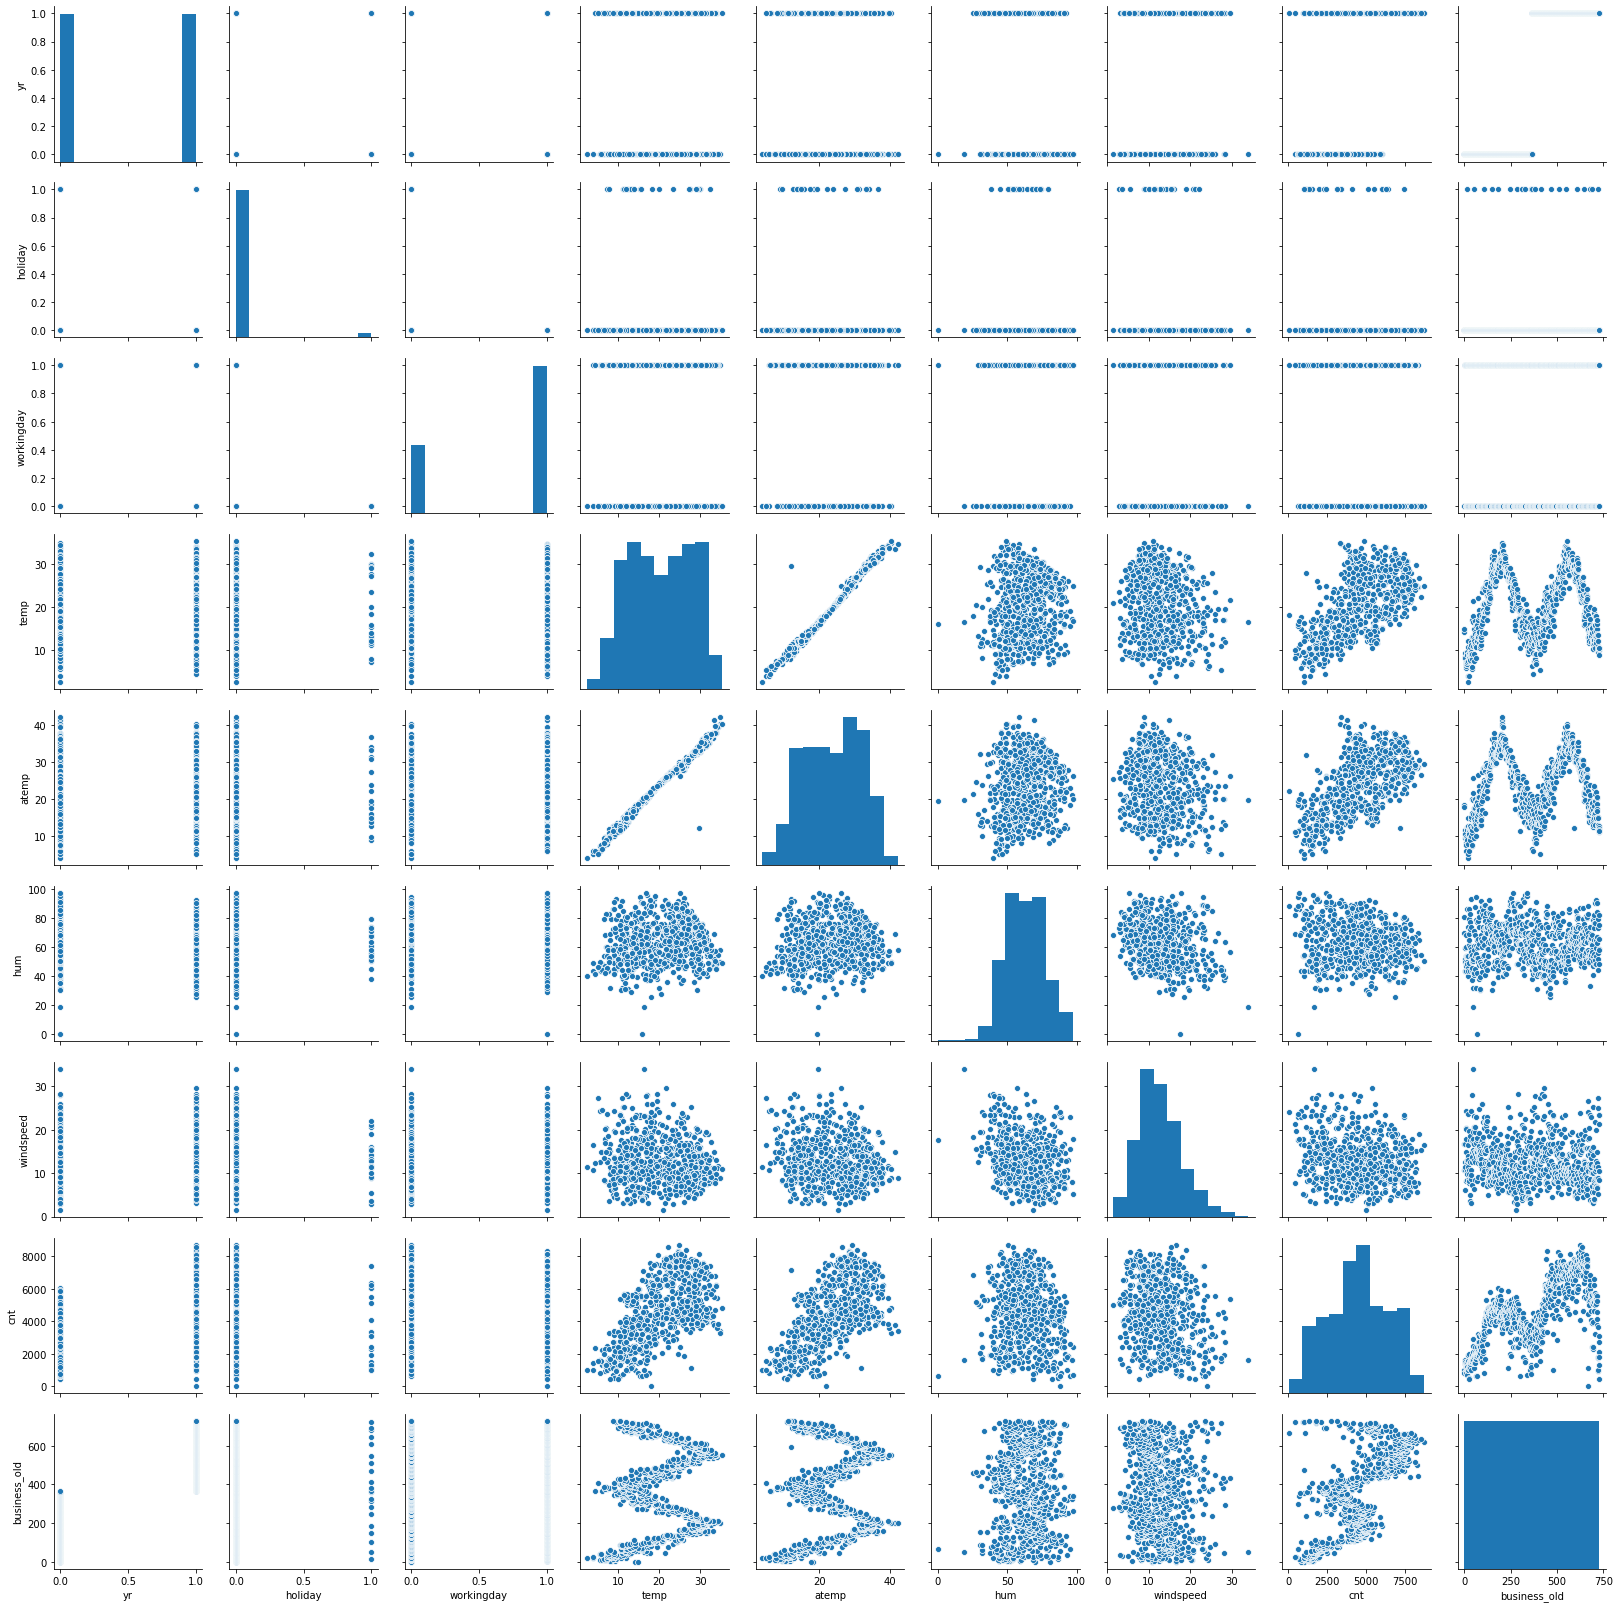

In [712]:
plt.figure(figsize=(15,30))
sns.pairplot(Bike)
plt.show()

<Figure size 1080x2160 with 0 Axes>

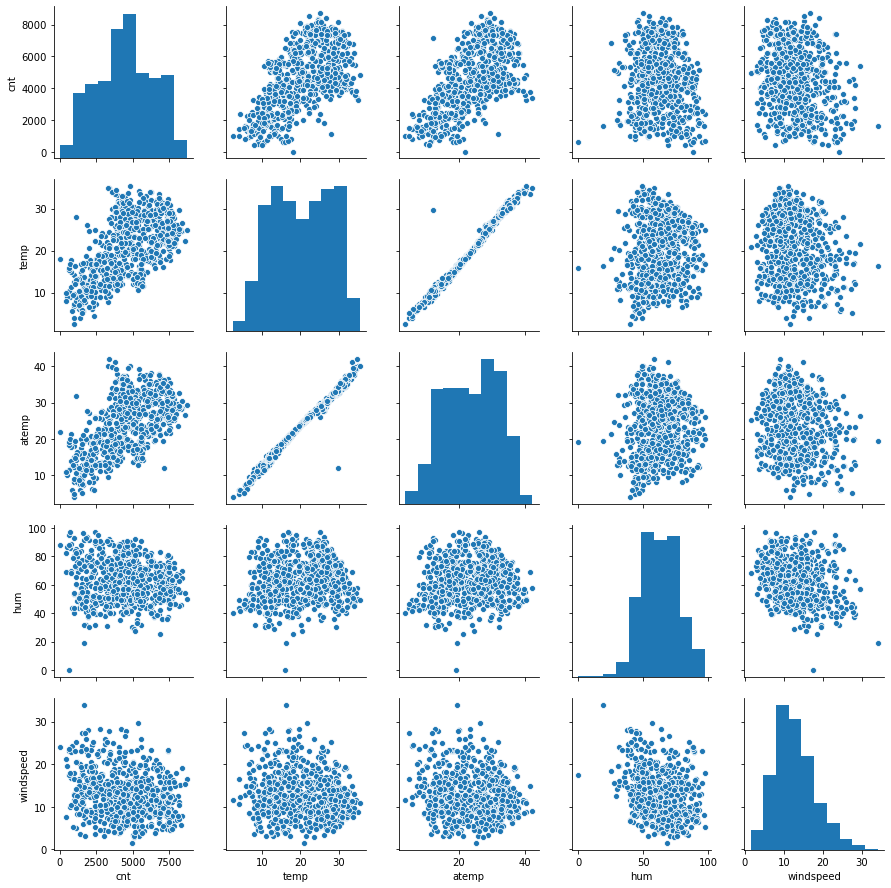

In [713]:
# Draw the pair plot based on above pair plot. There relationship betwen continous variable
plt.figure(figsize=(15,30))
sns.pairplot(data=Bike, vars=['cnt','temp','atemp','hum','windspeed'])
plt.show()

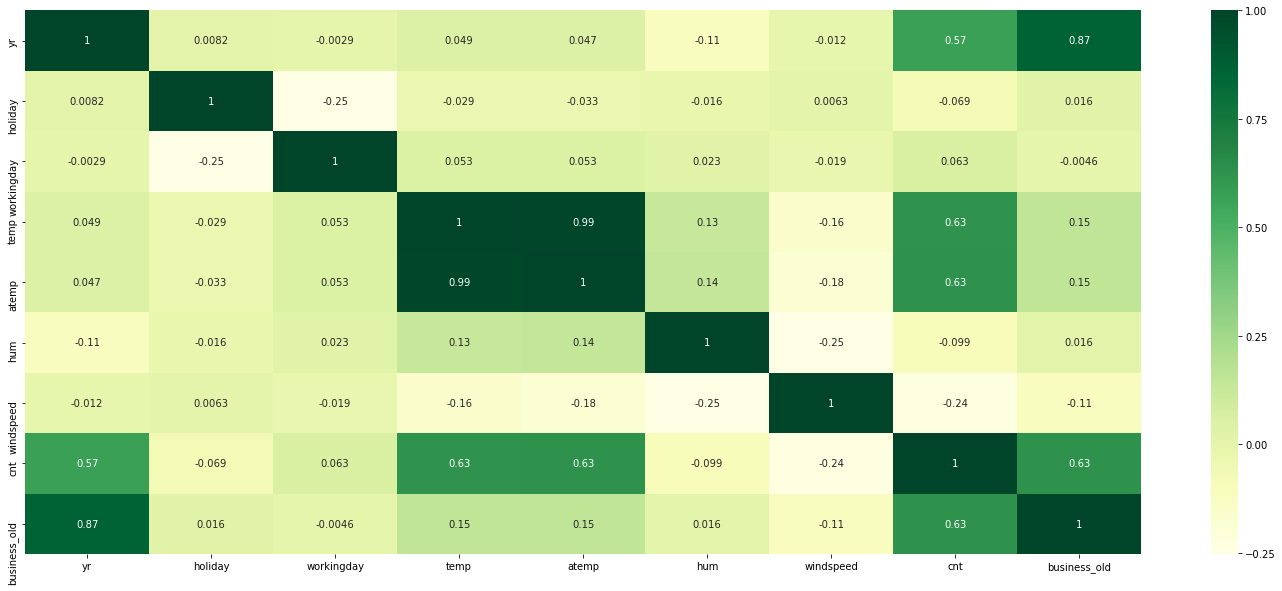

In [714]:
# Checking all variables relationship with each other
plt.figure(figsize=(25,10))
sns.heatmap(Bike.corr(), cmap='YlGn', annot = True)
plt.show()

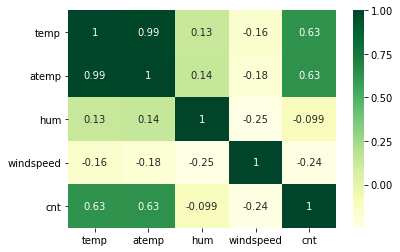

In [715]:
# Checking continuous variables relationship with each other
sns.heatmap(Bike[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='YlGn', annot = True)
plt.show()

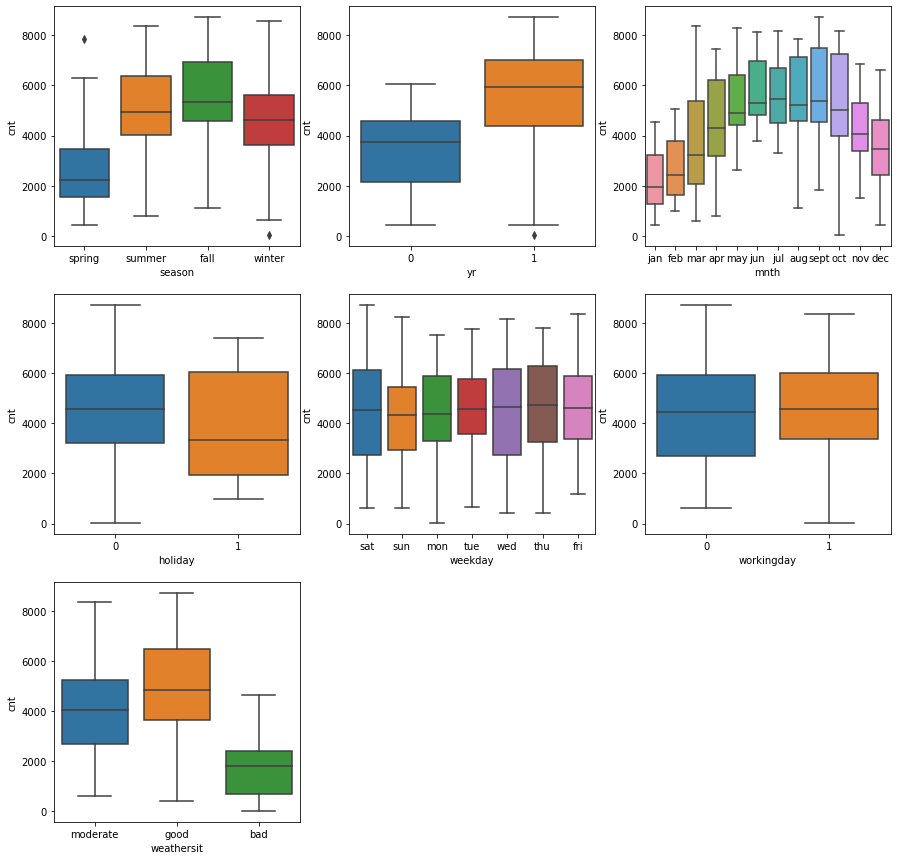

In [716]:
vars_categorical = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(vars_categorical):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=Bike, x=i[1], y='cnt')
plt.show()


### Observations:
 1. Season(fall) has highest demand
 2. Demand is increasing while increaing years
 3. From April to Sept the demand is more depiste Jul demand is low
 4. Weekday(saturadya and Thursday) demand is more
 5. Demand is more in weathersit(good)

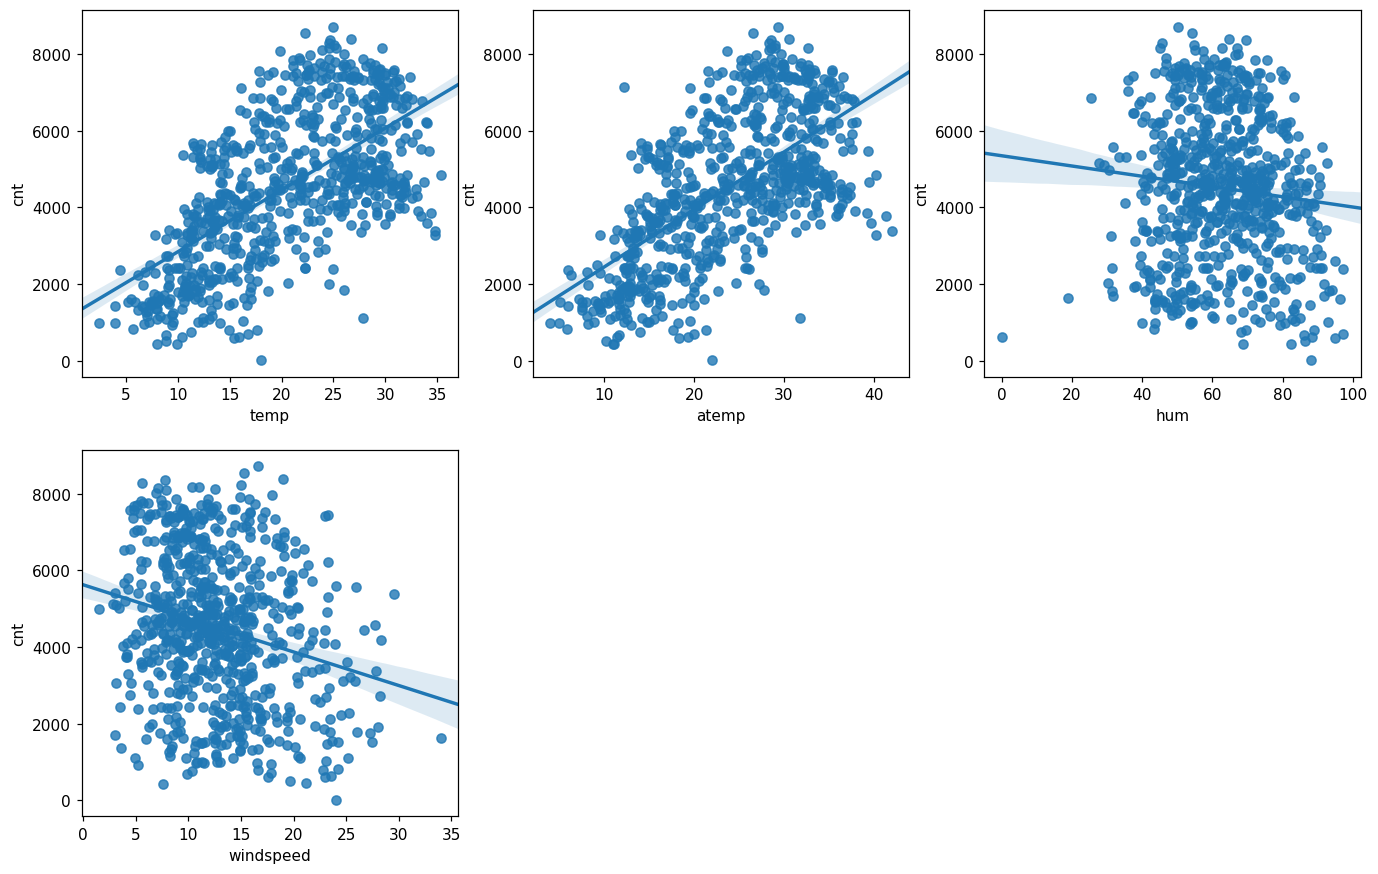

In [717]:
corr_plot = ['temp','atemp','hum','windspeed']
plt.figure(figsize=(15, 15),dpi=110)
for i in enumerate(corr_plot):
    #plt.title("Cnt vs x=i[1]",fontsize=16)
    plt.subplot(3,3,i[0]+1)
    sns.regplot(data=Bike, x=i[1], y='cnt')
plt.show()

### Observation:
__temp vs cnt and atemp vs cnt has postive correlation whereas hum vs cnt and windspeed vs cnt has negative correlation__

### Step 4: Data preparation for model buidling 
__Creating dummy variablesfor all categorical variable__
preparing the data for multiple linear regression. This involves handling the categorical variables first and then performing dummy encoding using mapping variables.
- Encoding:
   - Convering binary vars to binary encoding 1/0
   - other categorical vars to dummy vars
- Splitting into train and test
- Rescaling of variables

In [718]:
Bike = pd.get_dummies(data=Bike,columns=["season","mnth","weekday"],drop_first=True)
Bike = pd.get_dummies(data=Bike,columns=["weathersit"])


In [719]:
print(Bike.columns)
print("==================================================================================================")


Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'business_old', 'season_spring', 'season_summer',
       'season_winter', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_jul', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct',
       'mnth_sept', 'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')


In [720]:
Bike.head()
Bike.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,business_old,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849,364.500000,0.246575,...,0.082192,0.143836,0.143836,0.143836,0.142466,0.142466,0.141096,0.028767,0.634247,0.336986
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647,210.877136,0.431313,...,0.274845,0.351164,0.351164,0.351164,0.349767,0.349767,0.348359,0.167266,0.481971,0.473004
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,182.250000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,364.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,546.750000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,729.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [721]:
Bike.columns


Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'business_old', 'season_spring', 'season_summer',
       'season_winter', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_jul', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct',
       'mnth_sept', 'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

### Step 4: Splitting the data into Training and Testing Sets

In [722]:
## Now split the data set into Traning and Testing
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(Bike, train_size = 0.7, test_size = 0.3, random_state = 100)

In [723]:
print(df_train.shape)
print(df_test.shape)

(510, 32)
(219, 32)


In [724]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'business_old', 'season_spring', 'season_summer',
       'season_winter', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_jul', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct',
       'mnth_sept', 'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

#### Rescaling the Features
To make all features same scale to give same level interpretation
s you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see that except for __area__, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale.
As you know, there are two common ways of rescaling:
   1. Min-Max scaling (normalisation): data between 0 and 1 (x-xmin)/(xmax-xmin), it will take out the outliers
   2. Standardisation (mean-0, sigma-1): (x-mu)/sigma
   
The advantage of Standardisation over the other is that it doesn't compress the data between a particular range as in Min-Max scaling. This is useful, especially if there are extreme data point (outlier). Now, let's rescale and fit the data.


This time, we will use MinMax scaling.


In [725]:
# Importing required library
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
# calculate the VIFs for new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [726]:
# Let us scale continuous variables
vars_scal = ['temp','atemp','hum','windspeed','business_old','cnt']
#Use Normalized scaler to scale
# 1. Instantiate an object
scaler = MinMaxScaler()
#Fit and transform training set only
df_train[vars_scal] = scaler.fit_transform(df_train[vars_scal])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,business_old,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0.896978,0,...,0,0,0,0,0,1,0,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0.791209,0,...,0,0,0,0,0,1,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0.585165,1,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1.000000,1,...,0,0,0,1,0,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0.662088,0,...,0,0,1,0,0,0,0,0,0,1


### Step-5  Build a Model using RFE ( Automated approach) and Manual elimination

### Dividing into  X and Y sets for the model building

In [727]:
y_train=df_train.pop('cnt')
x_train=df_train

In [728]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(x_train,y_train)
rfe=RFE(lm,n_features_to_select=15) #running RFE
rfe=rfe.fit(x_train,y_train)
rfe

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [729]:
#Columns selected by RFE and their weights
list(zip(x_train.columns,rfe.support_,rfe.ranking_))


[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('business_old', False, 9),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 8),
 ('mnth_dec', False, 4),
 ('mnth_feb', False, 5),
 ('mnth_jan', False, 2),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 15),
 ('mnth_mar', False, 17),
 ('mnth_may', False, 7),
 ('mnth_nov', False, 3),
 ('mnth_oct', False, 10),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 12),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 11),
 ('weekday_thu', False, 14),
 ('weekday_tue', False, 13),
 ('weekday_wed', False, 16),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

In [730]:
x_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_jul',
       'mnth_sept', 'weekday_sat', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [731]:
x_train.columns[~rfe.support_]

Index(['atemp', 'business_old', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct',
       'weekday_mon', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed'],
      dtype='object')

### Build the Model
5.1 Model1-select all variables slected by RFE

In [732]:
# Select coulmns for Model-1
cols=x_train.columns[rfe.support_]
 # add constant
x_train_sm_1=sm.add_constant(x_train[cols])
    # create first model
lr_1=sm.OLS(y_train,x_train_sm_1).fit()
 #params
print("=======================================================================================================")
print(lr_1.summary())
print("=======================================================================================================")

#### VIF
df1 = x_train[cols]
vif = pd.DataFrame()    
vif['Features'] = df1.columns   
vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))
print("=======================================================================================================")


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Tue, 21 Jun 2022   Prob (F-statistic):          1.13e-191
Time:                        02:44:43   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1035    

- significance(p-values)
- VIF (tells how multicollineratiy exist in indpendt variable)

### Use two main parameters to judge the insignificant variables, the p-values and the VIFs.

VIF must <5 only required so drop higher VIF value columns
we could have :
- High p-value, high VIF
- High- low:
      - High p, low VIF----> 1st see this 
      - Low p, High VIF----> 2nd see this
- Low p, Low VIF


In [733]:
# Highest VIF value(weathersit_moderate) dropping and Build Model-2
cols=['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_jul',
       'mnth_sept', 'weekday_sat', 'weathersit_bad', 'weathersit_good',
       ]
 # add constant
x_train_sm_2=sm.add_constant(x_train[cols])
    # create first model
lr_2=sm.OLS(y_train,x_train_sm_2).fit()
 #params
print("=======================================================================================================")
print(lr_2.summary())
print("=======================================================================================================")

#### VIF
df1 = x_train[cols]
vif = pd.DataFrame()    
vif['Features'] = df1.columns   
vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))
print("=======================================================================================================")


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Tue, 21 Jun 2022   Prob (F-statistic):          1.13e-191
Time:                        02:44:43   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1815      0.039     

In [734]:
# Highest VIF value(hum) dropping and Build Model-3
cols=['yr', 'holiday', 'workingday', 'temp',  'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_jul',
       'mnth_sept', 'weekday_sat', 'weathersit_bad', 'weathersit_good',
       ]
 # add constant
x_train_sm_3=sm.add_constant(x_train[cols])
    # create first model
lr_3=sm.OLS(y_train,x_train_sm_3).fit()
 #params
print("=======================================================================================================")
print(lr_3.summary())
print("=======================================================================================================")

#### VIF
df1 = x_train[cols]
vif = pd.DataFrame()    
vif['Features'] = df1.columns   
vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))
print("=======================================================================================================")

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Tue, 21 Jun 2022   Prob (F-statistic):          5.73e-189
Time:                        02:44:43   Log-Likelihood:                 508.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     496   BIC:                            -930.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0742      0.031     

In [735]:
# Highest VIF value(mnth_jule) dropping and Build Model-4
cols=['yr', 'holiday', 'workingday', 'temp',  'windspeed',
       'season_spring', 'season_summer', 'season_winter', 
       'mnth_sept', 'weekday_sat', 'weathersit_bad', 'weathersit_good',
       ]
 # add constant
x_train_sm_4=sm.add_constant(x_train[cols])
    # create first model
lr_4=sm.OLS(y_train,x_train_sm_4).fit()
 #params
print("=======================================================================================================")
print(lr_4.summary())
print("=======================================================================================================")

#### VIF
df1 = x_train[cols]
vif = pd.DataFrame()    
vif['Features'] = df1.columns   
vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))
print("=======================================================================================================")

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     216.5
Date:                Tue, 21 Jun 2022   Prob (F-statistic):          1.48e-188
Time:                        02:44:43   Log-Likelihood:                 504.87
No. Observations:                 510   AIC:                            -983.7
Df Residuals:                     497   BIC:                            -928.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0662      0.031     

In [736]:
# Highest VIF value(workingday) dropping and Build Model-5
cols=['yr', 'holiday', 'temp',  'windspeed',
       'season_spring', 'season_summer', 'season_winter', 
       'mnth_sept', 'weekday_sat', 'weathersit_bad', 'weathersit_good',
       ]
 # add constant
x_train_sm_5=sm.add_constant(x_train[cols])
    # create first model
lr_5=sm.OLS(y_train,x_train_sm_5).fit()
 #params
print("=======================================================================================================")
print(lr_5.summary())
print("=======================================================================================================")

#### VIF
df1 = x_train[cols]
vif = pd.DataFrame()    
vif['Features'] = df1.columns   
vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))
print("=======================================================================================================")


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     227.7
Date:                Tue, 21 Jun 2022   Prob (F-statistic):          2.79e-186
Time:                        02:44:43   Log-Likelihood:                 496.65
No. Observations:                 510   AIC:                            -969.3
Df Residuals:                     498   BIC:                            -918.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1073      0.030     

__Model-5 is good fit becuase High R-square and lowest VIF values__
- Highest VIF value(weathersit_moderate) dropping and Build Model-2
- Highest VIF value(hum) dropping and Build Model-3
- Highest VIF value(mnth_jule) dropping and Build Model-4
- Highest VIF value(workingday) dropping and Build Model-5

### Obseravtions :
 From Model-6 of  Prob (F-statistic) is 2.79e-186 which is equal to zero hence overall model is significant

#### The equation of best fitted surface based model-6
cnt= 0.1073 +__yr__(0.2345) + __holiday__-(0.0936) + __temp__(0.4795) + __windspeed__-(0.1502)  + __season_spring__-(0.0548)+  __season_summer__(0.0614) +   __season_winter__(0.0959)+  __mnth_sept__(0.09)  +__weekday_sat__(0.0195) +__weathersit_bad__-(0.2062) __weathersit_good__(0.0802)
            
            
             
                
              
          
                   
_        
                
          

In [737]:
# Build the model with all columns to select features automatocally
lr1 = LinearRegression()
lr_sk=lr1.fit(x_train,y_train)
print(lr_sk.intercept_,lr_sk.coef_)

0.21472321959386775 [ 0.28383841 -0.05064007  0.03574615  0.40304988  0.04846273 -0.15098468
 -0.18418725 -0.10290352 -0.04910474  0.03832576  0.10479009  0.03357537
 -0.01056592 -0.04010182 -0.0746873  -0.02618285  0.00714038 -0.00271716
  0.02882592 -0.01076542  0.03459909  0.10353028 -0.02147769  0.03475889
 -0.01986497 -0.00978728 -0.01933648 -0.00578351 -0.15089814  0.10612791
  0.04477023]


### Step-6 Model Evaluation
__Residual Analysis of the train data__
so, new to check if the error terms are also normally distributed(which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like



In [738]:
y_train_prde=lr_5.predict(x_train_sm_5)


Text(0.5, 0, 'Errors')

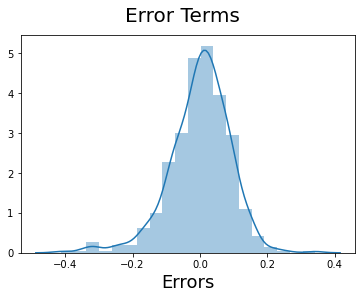

In [739]:
res=y_train-y_train_prde
fig=plt.figure()
sns.distplot(res,bins=20)
fig.suptitle('Error Terms', fontsize=20)            #plot heading
plt.xlabel('Errors',fontsize=18)                    # x-label

__Errors are normally distribured here with mean 0. So everything seems to be fine__

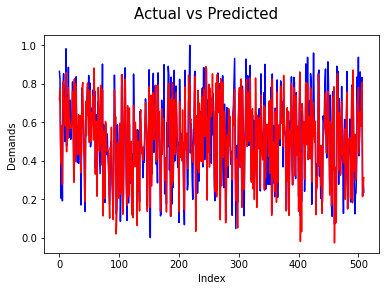

In [740]:
# Actual vs Predicted
c = [i for i in range(0,len(x_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_prde, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

#### Because the actual and predicted results are almost identical, this model appears to be valid.

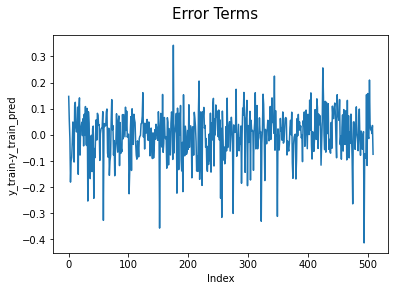

In [741]:
# Error Terms
Error_term = [i for i in range(0,len(x_train),1)]
plt.plot(Error_term,y_train-y_train_prde)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

#### Error terms are independent each other

In [742]:
#Print R-squared Value
r2_score(y_train,y_train_prde)

0.8341446838273208

##### R2 same as we obtained for our model_6

### Step7 Predict values for test data set

In [743]:
#Scale variables in X_test
num_vars = ['temp','atemp','hum','windspeed','business_old','cnt']
#Test data to be transformed only, no fitting
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [744]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,business_old,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.488704,0.255708,...,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.652968,0.319635
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.293496,0.437258,...,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.477117,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.004121,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.233516,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.478022,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,0.736951,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.001374,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [745]:
#dividing into x_test and y_test
y_test=df_test.pop('cnt')
x_test=df_test



In [687]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   219 non-null    int64  
 1   holiday              219 non-null    int64  
 2   workingday           219 non-null    int64  
 3   temp                 219 non-null    float64
 4   atemp                219 non-null    float64
 5   hum                  219 non-null    float64
 6   windspeed            219 non-null    float64
 7   business_old         219 non-null    float64
 8   season_spring        219 non-null    uint8  
 9   season_summer        219 non-null    uint8  
 10  season_winter        219 non-null    uint8  
 11  mnth_aug             219 non-null    uint8  
 12  mnth_dec             219 non-null    uint8  
 13  mnth_feb             219 non-null    uint8  
 14  mnth_jan             219 non-null    uint8  
 15  mnth_jul             219 non-null    ui

In [749]:
#Selecting variables that were part of the final model
col1=x_train_sm_5.columns
x_test_sm_final=sm.add_constant(x_test[cols])
x_test_sm_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   const            219 non-null    float64
 1   yr               219 non-null    int64  
 2   holiday          219 non-null    int64  
 3   temp             219 non-null    float64
 4   windspeed        219 non-null    float64
 5   season_spring    219 non-null    uint8  
 6   season_summer    219 non-null    uint8  
 7   season_winter    219 non-null    uint8  
 8   mnth_sept        219 non-null    uint8  
 9   weekday_sat      219 non-null    uint8  
 10  weathersit_bad   219 non-null    uint8  
 11  weathersit_good  219 non-null    uint8  
dtypes: float64(3), int64(2), uint8(7)
memory usage: 11.8 KB


In [751]:
#Making predictions using the final model
y_pred=lr_5.predict(x_test_sm_final)
y_pred.shape


(219,)

In [752]:
y_test.shape

(219,)

In [753]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8040514035726619

### Interepretation of results
Analysing the above model, the comapany should focus on the following features:
- Company should focus on expanding business during Summer.
- Company should focus on expanding business during September.
- Company should focus on doing the business during winter.
- Previous data indicates that if the situation returns to normal, there will be a surge in the number of users, as compared to 2019.
- During light snow or rain, there would be fewer bookings, so they could probably utilise this time to service the bikes without affecting business.
- As a result, when things return to normal, the company should come up with fresh deals in the spring when the weather is nice, as well as market a bit for September, when business is at its peak.
__Conclusion__
### Significant variables to predict the demand for shared bikes

1. holiday
2. temp
3. weathersit_good
4. windspeed
5. Season
6. months(January, July, September)
7. Year (2019)
8. Saturday
